# PLDT Stock Price Prediction using LSTM

In [1]:
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook 
import yfinance as yf   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

# Import Libraries
1. yfinance - dataset from yfinance
2. Numpy - arrays 
3. pandas - dataframe manipulation
4. matplotlib - data visualization
5. MinMaxScaler - data preprocessing
6. keras - Neural Network Machine Learning

# Stock data of PLDT Philippines from Yahoo Finance from March 2020 to Oct 2022

In [2]:
pldt_df = yf.download('PHI','2020-03-01','2022-10-11') 
pldt_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02 00:00:00-05:00,18.879999,19.510000,18.760000,19.459999,15.921046,102100
2020-03-03 00:00:00-05:00,19.280001,19.709999,19.219999,19.559999,16.002859,161300
2020-03-04 00:00:00-05:00,19.820000,20.180000,19.750000,20.170000,16.501926,67200
2020-03-05 00:00:00-05:00,19.940001,20.760000,19.940001,20.590000,16.845547,99500
2020-03-06 00:00:00-05:00,20.250000,20.559999,19.930000,20.200001,16.526472,96900
...,...,...,...,...,...,...
2022-10-04 00:00:00-04:00,25.870001,25.980000,25.490000,25.850000,25.850000,125700
2022-10-05 00:00:00-04:00,25.510000,25.639999,24.820000,25.030001,25.030001,91300
2022-10-06 00:00:00-04:00,25.299999,25.639999,25.230000,25.389999,25.389999,126000


# Input Data
The input data that would be used is during the Open of the market.

In [3]:
training_set = pldt_df.iloc[:,1:2].values
# Uses the Open column for training_set
training_set.shape

(659, 1)

# Pre-Process
Using Min Max Scaler to reduce computation time while retaining the value.

In [4]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.09222169],
       [0.10153696],
       [0.12342803],
       [0.15044246],
       [0.1411271 ],
       [0.09827661],
       [0.10805774],
       [0.11411267],
       [0.08756401],
       [0.08430366],
       [0.09268746],
       [0.08476943],
       [0.07219373],
       [0.01583606],
       [0.        ],
       [0.04005583],
       [0.08150909],
       [0.09594781],
       [0.15649738],
       [0.13833253],
       [0.1369352 ],
       [0.16068929],
       [0.20819746],
       [0.1881695 ],
       [0.20819746],
       [0.26269211],
       [0.27247316],
       [0.23847224],
       [0.21285514],
       [0.2286912 ],
       [0.26036331],
       [0.25058218],
       [0.22449929],
       [0.25850021],
       [0.27340471],
       [0.28737775],
       [0.32184444],
       [0.32091288],
       [0.35211922],
       [0.36516071],
       [0.35770837],
       [0.40754543],
       [0.38379134],
       [0.32743358],
       [0.32557056],
       [0.34699577],
       [0.36003725],
       [0.353

# How would the model work?
The model will be using 60 inputs in order to predict the output. Which means it looks back in time for 60 days for a single prediction. Therefore the data of each days of the 60 days will go through the LSTM layers to predict the needed output.


In [5]:
time_step = 60
# Days that the model will be using to make prediction = 60
X_train = []
y_train = []
for i in range(time_step,pldt_df.shape[0]):
    X_train.append(scaled_training_set[i-time_step:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
print(X_train.shape)
print(y_train.shape)

(599, 60)
(599,)


In [7]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(599, 60, 1)

# Choose the model
LSTM model was used to forecast predictions since it is good for time-series forecasting such as this problem.

In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, return_sequences = False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = regressor.fit(X_train, y_train, epochs=120, batch_size=32)

Epoch 1/120
19/19 [==============================] - 8s 67ms/step - loss: 0.0939
Epoch 2/120
19/19 [==============================] - 1s 72ms/step - loss: 0.0241
Epoch 3/120
19/19 [==============================] - 2s 114ms/step - loss: 0.0176
Epoch 4/120
19/19 [==============================] - 1s 72ms/step - loss: 0.0158
Epoch 5/120
19/19 [==============================] - 1s 74ms/step - loss: 0.0141
Epoch 6/120
19/19 [==============================] - 1s 70ms/step - loss: 0.0136
Epoch 7/120
19/19 [==============================] - 2s 80ms/step - loss: 0.0123
Epoch 8/120
19/19 [==============================] - 2s 88ms/step - loss: 0.0125
Epoch 9/120
19/19 [==============================] - 2s 86ms/step - loss: 0.0115
Epoch 10/120
19/19 [==============================] - 2s 86ms/step - loss: 0.0140
Epoch 11/120
19/19 [==============================] - 1s 69ms/step - loss: 0.0119
Epoch 12/120
19/19 [==============================] - 1s 69ms/step - loss: 0.0108
Epoch 13/120
19/19 [====

Epoch 101/120
19/19 [==============================] - 1s 70ms/step - loss: 0.0041
Epoch 102/120
19/19 [==============================] - 2s 80ms/step - loss: 0.0039
Epoch 103/120
19/19 [==============================] - 1s 75ms/step - loss: 0.0041
Epoch 104/120
19/19 [==============================] - 1s 74ms/step - loss: 0.0036
Epoch 105/120
19/19 [==============================] - 1s 75ms/step - loss: 0.0040
Epoch 106/120
19/19 [==============================] - 1s 77ms/step - loss: 0.0036
Epoch 107/120
19/19 [==============================] - 1s 75ms/step - loss: 0.0040
Epoch 108/120
19/19 [==============================] - 2s 82ms/step - loss: 0.0037
Epoch 109/120
19/19 [==============================] - 2s 80ms/step - loss: 0.0038
Epoch 110/120
19/19 [==============================] - 1s 75ms/step - loss: 0.0039
Epoch 111/120
19/19 [==============================] - 1s 74ms/step - loss: 0.0043
Epoch 112/120
19/19 [==============================] - 1s 70ms/step - loss: 0.0039
Epoc

### Training model loss
-using 11 layers and 30 neurons per LSTM layer the loss of the model after 120 epochs with batch size of 32 was 0.0032.

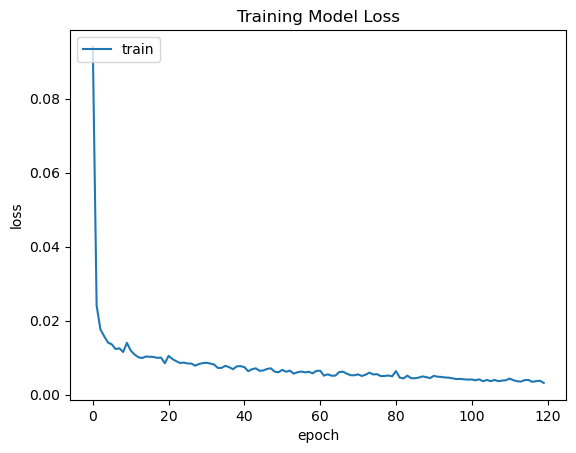

In [17]:
plt.plot(hist.history['loss'])
plt.title('Training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Test Data from March 2020 to October 2022

In [19]:
test_data = yf.download('PHI','2020-03-01','2022-10-11') 
test_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02 00:00:00-05:00,18.879999,19.510000,18.760000,19.459999,15.921046,102100
2020-03-03 00:00:00-05:00,19.280001,19.709999,19.219999,19.559999,16.002859,161300
2020-03-04 00:00:00-05:00,19.820000,20.180000,19.750000,20.170000,16.501928,67200
2020-03-05 00:00:00-05:00,19.940001,20.760000,19.940001,20.590000,16.845549,99500
2020-03-06 00:00:00-05:00,20.250000,20.559999,19.930000,20.200001,16.526474,96900
...,...,...,...,...,...,...
2022-10-04 00:00:00-04:00,25.870001,25.980000,25.490000,25.850000,25.850000,125700
2022-10-05 00:00:00-04:00,25.510000,25.639999,24.820000,25.030001,25.030001,91300
2022-10-06 00:00:00-04:00,25.299999,25.639999,25.230000,25.389999,25.389999,126000


In [20]:
# test model accuracy on existing data
actual_prices = test_data['Close'].values

total_dataset = pd.concat((pldt_df['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - time_step:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [21]:
x_test = []
for x in range(time_step, len(model_inputs)):
    x_test.append(model_inputs[x - time_step : x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = regressor.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

21/21 [==============================] - 0s 18ms/step


# Share Price for Predicted and Actual PLDT Share price

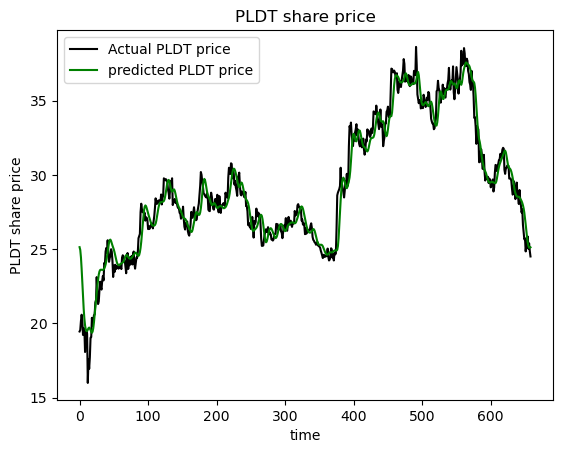

In [22]:
plt.plot(actual_prices, color='black', label=f"Actual PLDT price")
plt.plot(predicted_prices, color= 'green', label=f"predicted PLDT price")
plt.title(f"PLDT share price")
plt.xlabel("time")
plt.ylabel(f"PLDT share price")
plt.legend()
plt.show()

# Prediction (Manual Input up to 60 days)

How many days you want to predict?(Up to 60 days): 10
1/1 [==============================] - 0s 24ms/step
Prediction Day 1:[[25.136929]]
1/1 [==============================] - 0s 22ms/step
Prediction Day 2:[[25.139183]]
1/1 [==============================] - 0s 23ms/step
Prediction Day 3:[[25.141615]]
1/1 [==============================] - 0s 22ms/step
Prediction Day 4:[[25.144318]]
1/1 [==============================] - 0s 23ms/step
Prediction Day 5:[[25.14722]]
1/1 [==============================] - 0s 23ms/step
Prediction Day 6:[[25.150215]]
1/1 [==============================] - 0s 22ms/step
Prediction Day 7:[[25.153168]]
1/1 [==============================] - 0s 22ms/step
Prediction Day 8:[[25.155928]]
1/1 [==============================] - 0s 22ms/step
Prediction Day 9:[[25.158075]]
1/1 [==============================] - 0s 21ms/step
Prediction Day 10:[[25.15939]]


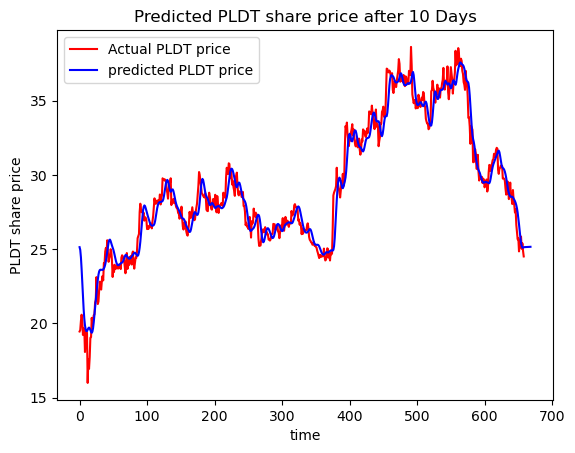

In [24]:
Days=int(input('How many days you want to predict?(Up to 60 days): '))
prediction_graph=[]
for Days in range (0,Days):
    real_data = [model_inputs[len(model_inputs)+Days - time_step:len(model_inputs+Days),0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
    prediction = regressor.predict(real_data)
    prediction = scaler.inverse_transform(prediction)
    print("Prediction Day "+str(Days+1)+":"+str(prediction))
    prediction_graph.append(prediction)
    
sadf=np.append(predicted_prices,prediction_graph)
plt.plot(actual_prices, color='red', label=f"Actual PLDT price")
plt.plot(sadf, color= 'blue', label=f"predicted PLDT price")
plt.title(f"Predicted PLDT share price after "+str(Days+1)+" Days")
plt.xlabel("time")
plt.ylabel(f"PLDT share price")
plt.legend()
plt.show()

# Prediction
- 12/10/2022	25.139183
- 13/10/2022	25.141615
- 14/10/2022	25.144318
- 15/10/2022	25.14722
- 16/10/2022	25.150215
- 17/10/2022	25.153168
- 18/10/2022	25.155928
- 19/10/2022	25.158075

